In [1]:
from tensorflow.keras import layers, Model
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)

num_classes = len(unique_labels)

batch_size = 32
img_height = 32
img_width = 32

def residual_block(x, filters, kernel_size, strides=(1, 1), padding='same'):
    # Shortcut branch
    shortcut = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    shortcut = layers.BatchNormalization()(shortcut)

    # Main branch
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)

    # Add shortcut and main branch
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# Define the model
inputs = layers.Input(shape=(img_height, img_width, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, (7, 7), strides=(1, 1), padding='valid', activation='relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Add residual blocks
x = residual_block(x, filters=16, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

x = residual_block(x, filters=32, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_classes)(x)

model = Model(inputs, outputs)
model.summary()


Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 32, 32, 3) │          0 │ input_layer[0][0] │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 26, 26,    │      2,368 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 13, 13,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 13, 13,    │      2,320 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 13, 13,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 13, 13,    │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 13, 13,    │      2,320 │ max_pooling2d[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 13, 13,    │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 13, 13,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 13, 13,    │          0 │ add[0][0]         │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 6, 6, 16)  │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 6, 6, 32)  │      4,640 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 6, 6, 32)  │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 6, 6, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 78,324 (305.95 KB)

 Trainable params: 78,036 (304.83 KB)

 Non-trainable params: 288 (1.12 KB)

Epoch 1/10
1563/1563 - 54s - 35ms/step - accuracy: 0.1204 - loss: 3.7987 - val_accuracy: 0.1711 - val_loss: 3.5095
Epoch 2/10
1563/1563 - 34s - 22ms/step - accuracy: 0.2200 - loss: 3.1999 - val_accuracy: 0.1967 - val_loss: 3.3505
Epoch 3/10
1563/1563 - 31s - 20ms/step - accuracy: 0.2711 - loss: 2.9299 - val_accuracy: 0.2553 - val_loss: 3.0394
Epoch 4/10
1563/1563 - 33s - 21ms/step - accuracy: 0.3019 - loss: 2.7589 - val_accuracy: 0.2724 - val_loss: 2.9408
Epoch 5/10
1563/1563 - 56s - 36ms/step - accuracy: 0.3327 - loss: 2.6227 - val_accuracy: 0.2672 - val_loss: 3.0427
Epoch 6/10
1563/1563 - 55s - 35ms/step - accuracy: 0.3545 - loss: 2.5192 - val_accuracy: 0.1587 - val_loss: 3.9863
Epoch 7/10
1563/1563 - 57s - 36ms/step - accuracy: 0.3719 - loss: 2.4272 - val_accuracy: 0.2882 - val_loss: 2.8679
Epoch 8/10
1563/1563 - 48s - 31ms/step - accuracy: 0.3916 - loss: 2.3465 - val_accuracy: 0.3076 - val_loss: 2.8318
Epoch 9/10
1563/1563 - 47s - 30ms/step - accuracy: 0.4015 - loss: 2.2869 - val_a

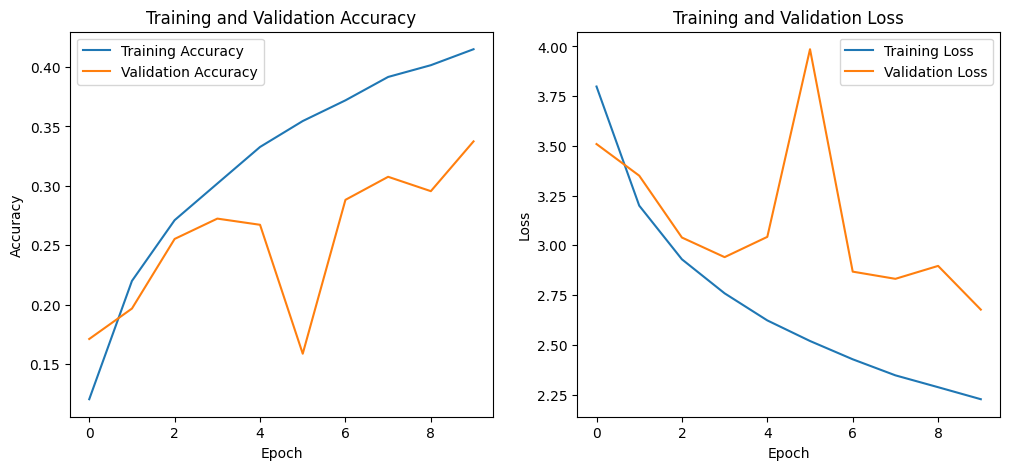

In [2]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 10
history_bn_model_filter = model.fit(
  train_images,train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)




# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

#accuracy is 0.59

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_filter.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_filter.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_filter.history['loss'], label='Training Loss')
plt.plot(history_bn_model_filter.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()




